In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

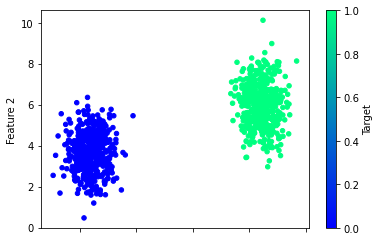

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 4ms/step - loss: 0.7024 - accuracy: 0.1347
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.1853
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.2653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4733
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5067
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.5067
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.5067
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 997us/step - loss: 0.1010 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 955us/step - loss: 0.0960 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 997us/step - loss: 0.0914 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 981us/step - loss: 0.0885 - accuracy:

<AxesSubplot:>

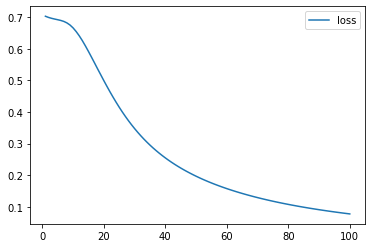

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

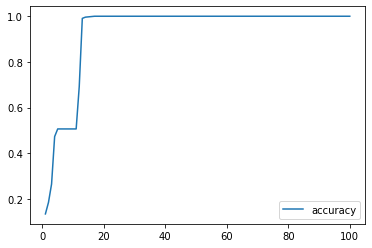

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0804 - accuracy: 1.0000 - 193ms/epoch - 24ms/step
Loss: 0.08036122471094131, Accuracy: 1.0


The neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy.

In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

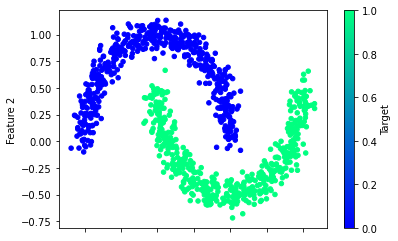

In [16]:
# Use the same models and neural network to fit the nonlinear moon-shaped data
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.5733
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.5853
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.6000
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6147
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6347
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6400
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.6427
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6480
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.6573
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.6680
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8760
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8760
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8773
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8787
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8800
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8800
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2721 - accuracy: 0.8813
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.8813
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8813
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8813
Epoch 93/100


<AxesSubplot:>

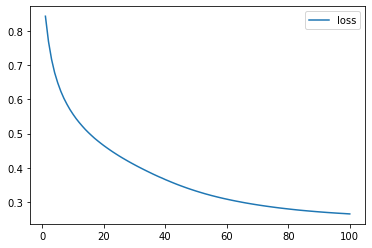

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

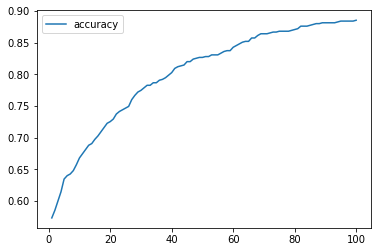

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9772 - accuracy: 0.4627
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9133 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8568 - accuracy: 0.4693
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8075 - accuracy: 0.4693
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.4707
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.4813
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5213
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.5507
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.5653
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6027
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.8987
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.8987
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.8987
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.8987
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.9013
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.9013
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2352 - accuracy: 0.9027
